<a href="https://colab.research.google.com/github/lee7py/2021-py-DNN/blob/main/code/4-2%20reg_mpg_auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [ ]:
pip install seaborn

In [ ]:
pip install -q seaborn

In [1]:
pip --help


Usage:   
  pip3 <command> [options]

Commands:
  install                     Install packages.
  download                    Download packages.
  uninstall                   Uninstall packages.
  freeze                      Output installed packages in requirements format.
  list                        List installed packages.
  show                        Show information about installed packages.
  check                       Verify installed packages have compatible dependencies.
  config                      Manage local and global configuration.
  search                      Search PyPI for packages.
  cache                       Inspect and manage pip's wheel cache.
  wheel                       Build wheels from your requirements.
  hash                        Compute hashes of package archives.
  completion                  A helper command used for command completion.
  debug                       Show information useful for debugging.
  help                        Show help

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)
print(sns.__version__)

2.5.0
0.11.1


In [47]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

In [48]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [49]:
dataset.shape

(398, 8)

In [50]:
type(dataset)

pandas.core.frame.DataFrame

In [51]:
# 데이터 정제, 비어있는 열의 행의 수 알아내기
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [52]:
# 비어 있는 열이 하나라도 있는 행을 제거
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [53]:
# 열 'Origin'을 빼내 origin에 저장
origin = dataset.pop('Origin')
type(origin)

pandas.core.series.Series

In [54]:
type(origin)
origin

0      1
1      1
2      1
3      1
4      1
      ..
393    1
394    2
395    1
396    1
397    1
Name: Origin, Length: 392, dtype: int64

In [55]:
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70


In [ ]:
dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
0,18.0,8,307.0,130.0,3504.0,12.0,70
1,15.0,8,350.0,165.0,3693.0,11.5,70
2,18.0,8,318.0,150.0,3436.0,11.0,70
3,16.0,8,304.0,150.0,3433.0,12.0,70
4,17.0,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82
394,44.0,4,97.0,52.0,2130.0,24.6,82
395,32.0,4,135.0,84.0,2295.0,11.6,82
396,28.0,4,120.0,79.0,2625.0,18.6,82


In [56]:
# "Origin" 열은 수치형이 아니고 범주형이므로 원-핫 인코딩(one-hot encoding)으로 변환
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [57]:
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(train_dataset.shape, test_dataset.shape)

(314, 10) (78, 10)


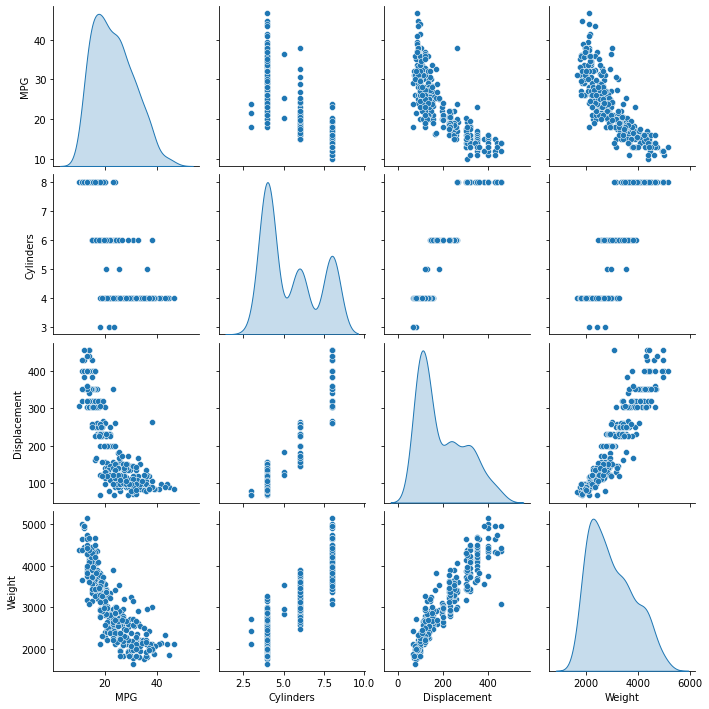

In [58]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [60]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [61]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [62]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
normed_train_data.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
281,0.307270,0.044872,-0.521559,-0.000298,0.946772,0.843910,0.774676,-0.465148,-0.495225
229,1.483887,1.961837,1.972127,1.457223,-1.598734,0.299787,0.774676,-0.465148,-0.495225
150,-0.869348,-0.836932,-0.311564,-0.710099,-0.021237,-0.516397,-1.286751,-0.465148,2.012852
145,-0.869348,-1.076553,-1.151543,-1.169870,1.233589,-0.516397,-1.286751,-0.465148,2.012852
182,-0.869348,-0.846517,-0.495310,-0.623596,-0.021237,0.027726,-1.286751,2.143005,-0.495225


In [63]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                  optimizer=optimizer,
                  metrics=['mae', 'mse'])
    return model

In [64]:
train_dataset.keys()

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [65]:
model = build_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [66]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.24730197],
       [-0.12888122],
       [-0.3563804 ],
       [-0.5133858 ],
       [-0.01269805],
       [-0.09359385],
       [-0.04866177],
       [ 0.17287454],
       [-0.1186613 ],
       [ 0.07316745]], dtype=float32)

In [67]:
train_labels[:10]

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
257    19.4
310    38.1
328    30.0
125    20.0
108    20.0
Name: MPG, dtype: float64

In [68]:
# 에포크가 끝날 때마다 점(.)을 출력, 100번마다 다음 줄로 이동해 훈련 진행 과정을 표시합니다
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 50 == 0: print('')
        print(':', end='')

EPOCHS = 1000

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, 
                    validation_split = 0.2, verbose=0, callbacks=[PrintDot()])


::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::::::::::::::::::::::
::::::::::::::::::::::::::::::

In [69]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.117966,0.941226,2.117966,9.088673,2.233587,9.088673,995
996,2.181125,0.952277,2.181125,9.244805,2.281991,9.244805,996
997,2.060366,0.936539,2.060366,8.405989,2.219047,8.405989,997
998,2.022963,0.955369,2.022963,8.734380,2.261567,8.734380,998
999,1.938538,0.896802,1.938538,8.763934,2.284178,8.763934,999


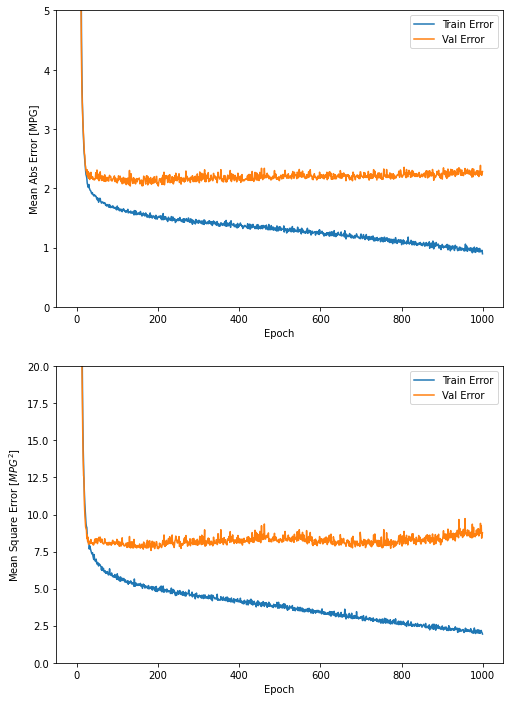

In [70]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(8,12))

    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()

plot_history(history)


::::::::::::::::::::::::::::::::::::::::::::::::::
::

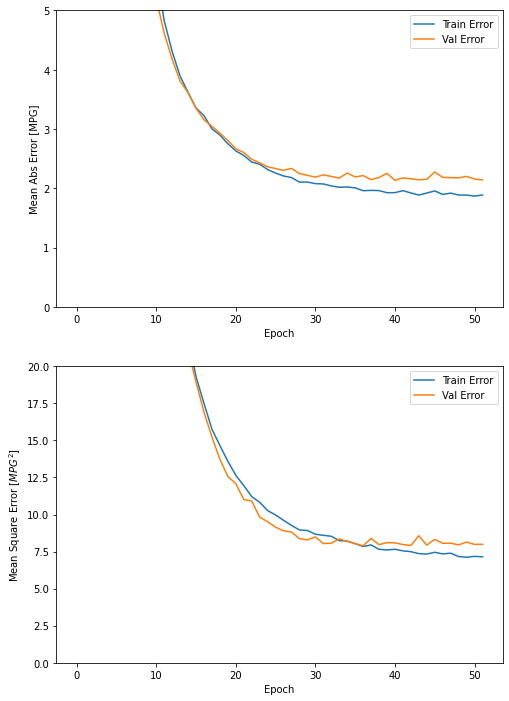

In [71]:
model = build_model()

# patience 매개변수는 성능 향상을 체크할 에포크 횟수입니다
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [72]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

3/3 - 0s - loss: 5.8833 - mae: 1.8873 - mse: 5.8833
테스트 세트의 평균 절대 오차:  1.89 MPG


46.065
48.123448495864864


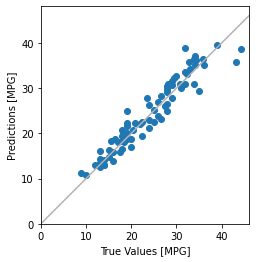

In [73]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal') # 각 축의 범위와 축의 스케일을 동일하게 설정
plt.axis('square') # 각 축의 범위를 xmax - xmin = ymax - ymin 이 되도록 설정
print(plt.xlim()[1])
plt.xlim([0, plt.xlim()[1]])
print(plt.ylim()[1])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100], c='.7')

(20.0, 30.0)

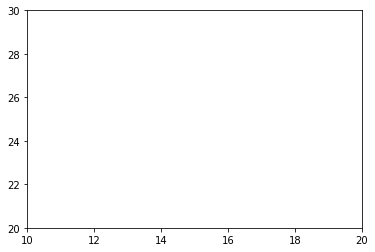

In [74]:
plt.xlim([10, 20])
plt.ylim([20, 30])

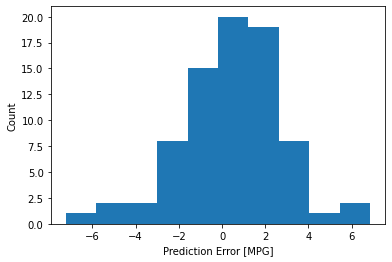

In [75]:
error = test_predictions - test_labels
plt.hist(error, bins = 10)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

In [76]:
test_predictions[:10]

array([16.303478, 10.73998 , 11.295005, 22.63458 , 21.625767, 13.055745,
       13.11635 , 12.578908, 19.42632 , 29.371609], dtype=float32)

In [77]:
test_labels[:10]

9     15.0
25    10.0
28     9.0
31    25.0
33    19.0
39    14.0
40    14.0
43    13.0
48    18.0
54    35.0
Name: MPG, dtype: float64